In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [221]:
df = pd.read_csv('ds/w3.csv')
print(df)

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[169 rows x 4 columns]


In [222]:
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [223]:
df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [224]:
df = df.dropna()

In [225]:
df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [226]:
df.std(numeric_only=True)

Duration     42.888820
Pulse        14.637516
Maxpulse     16.583060
Calories    266.379919
dtype: float64

In [227]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,164.0,64.146341,42.888820,15.0,45.000,60.0,60.0,300.0
Pulse,164.0,107.676829,14.637516,80.0,100.000,105.5,111.0,159.0
Maxpulse,164.0,134.274390,16.583060,100.0,124.000,131.0,143.0,184.0
Calories,164.0,375.790244,266.379919,50.3,250.925,318.6,387.6,1860.4


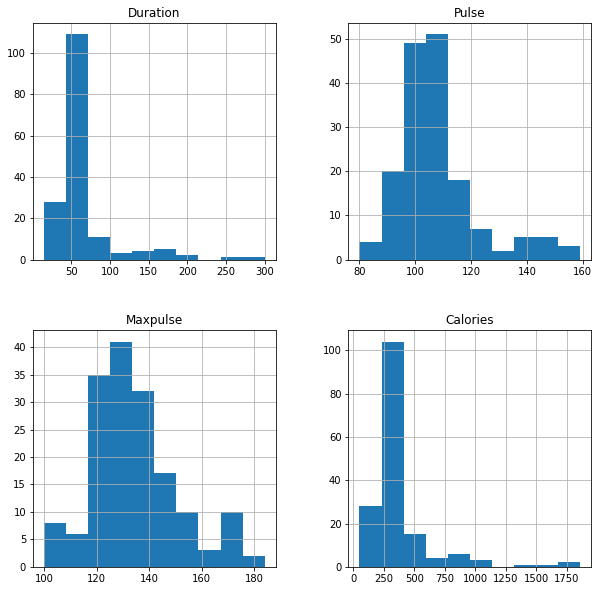

In [228]:
df.hist(figsize=(10,10))
plt.show()

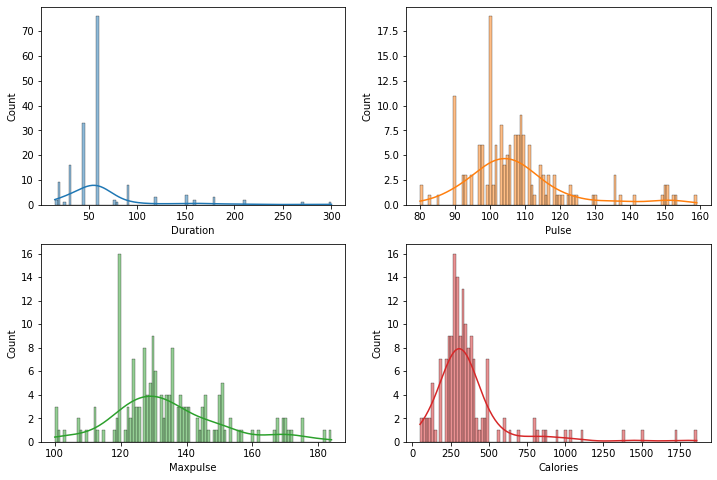

In [229]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, column in enumerate(df.columns):
    sns.histplot(df[column], color='C{}'.format(i), bins=100, kde=True, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_xlabel(column)

plt.show()


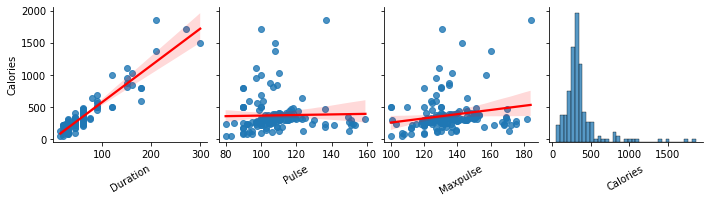

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in range(0, len(df.columns), 4):
    g = sns.pairplot(data=df,
                     x_vars=df.columns[i:i+4],
                     y_vars=['Calories'], kind='reg', plot_kws={'line_kws':{'color':'red'}})
    for ax in g.axes.flatten():
        ax.set_xlabel(ax.get_xlabel(), fontsize=10, rotation=30)
        ax.set_ylabel(ax.get_ylabel(), fontsize=10)
plt.show()

In [231]:
# list the columns to transform
cols_to_transform = ['Duration', 'Maxpulse', 'Pulse', 'Calories']

# apply a logarithmic transformation to the specified columns

# The Data is interpreted as right-skewed. 
# Making Log Transform a better option than a Square Transform.
# if in case that it is left-skewed, Square Transform may be a better option.

for col in cols_to_transform:
    df[col] = np.log(df[col])

# store the transformed data in a new dataframe
new_df = df.copy()

In [232]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,164.000000,164.000000,164.000000,164.000000
mean,4.011902,4.670736,4.892539,5.764605
std,0.523144,0.127463,0.120885,0.558803
min,2.708050,4.382027,4.605170,3.918005
25%,3.806662,4.605170,4.820282,5.525154
50%,4.094345,4.658700,4.875197,5.763935
75%,4.094345,4.709530,4.962845,5.959974
max,5.703782,5.068904,5.214936,7.528547


In [233]:
new_df.describe()

,Duration,Pulse,Maxpulse,Calories
count,164.000000,164.000000,164.000000,164.000000
mean,4.011902,4.670736,4.892539,5.764605
std,0.523144,0.127463,0.120885,0.558803
min,2.708050,4.382027,4.605170,3.918005
25%,3.806662,4.605170,4.820282,5.525154
50%,4.094345,4.658700,4.875197,5.763935
75%,4.094345,4.709530,4.962845,5.959974
max,5.703782,5.068904,5.214936,7.528547


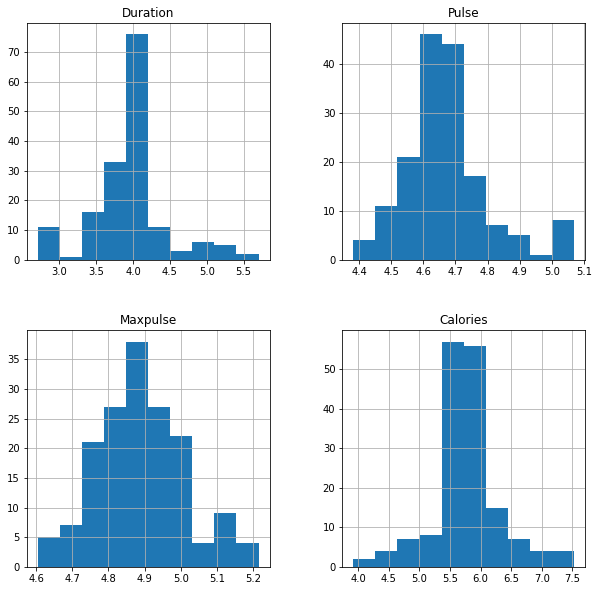

In [234]:
new_df.hist(figsize=(10,10))
plt.show()

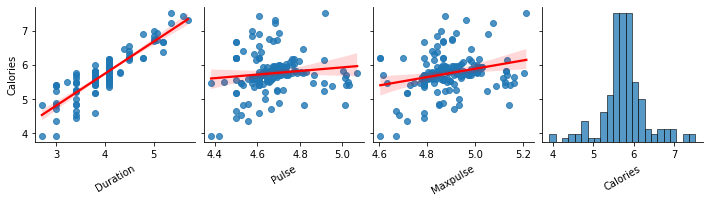

In [235]:
for i in range(0, len(new_df.columns), 5):
    g = sns.pairplot(data=new_df,
                     x_vars=new_df.columns[i:i+5],
                     y_vars=['Calories'], kind='reg', plot_kws={'line_kws':{'color':'red'}})
    for ax in g.axes.flatten():
        ax.set_xlabel(ax.get_xlabel(), fontsize=10, rotation=30)
        ax.set_ylabel(ax.get_ylabel(), fontsize=10)
plt.show()

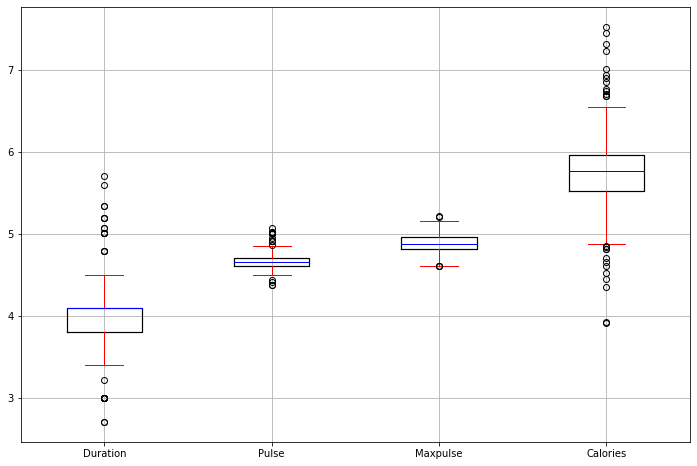

In [236]:
# Create a boxplot of the entire DataFrame
plt.figure(figsize=(12,8))
df.boxplot(boxprops=dict(linestyle='-', linewidth=1.2), 
           color=dict(whiskers='r', medians='b', caps='r'))
plt.show()

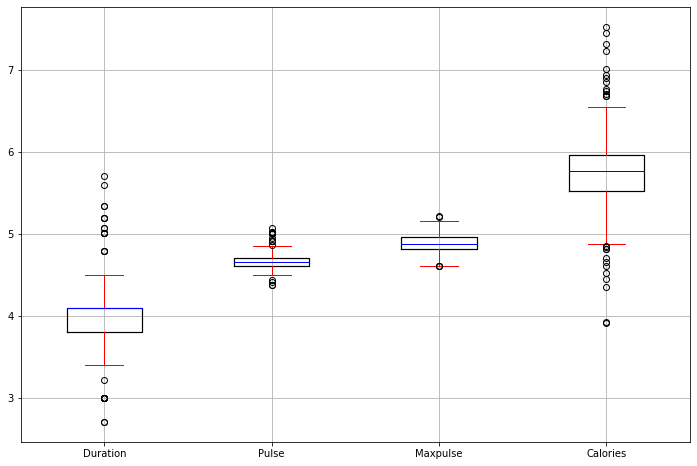

In [237]:
# Create a boxplot of the entire DataFrame
plt.figure(figsize=(12,8))
new_df.boxplot(boxprops=dict(linestyle='-', linewidth=1.2), 
           color=dict(whiskers='r', medians='b', caps='r'))
plt.show()

In [241]:
from scipy import stats

# Assuming your original DataFrame is called df
numeric_cols = df.select_dtypes(include='float').columns.tolist()
z_scores = stats.zscore(df[numeric_cols])

# Set a threshold for the number of standard deviations to be considered an outlier
threshold = 3

# Get the indices of the outliers
outlier_indices = np.where(np.abs(z_scores) > threshold)

print(outlier_indices)

(array([ 67,  77,  77,  78,  87,  90, 106], dtype=int64), array([0, 0, 3, 1, 3, 3, 3], dtype=int64))


In [242]:
# Remove the outliers from the original DataFrame
clean_df = df.drop(outlier_indices[0])

In [243]:
np.var(df).sum()

0.6130398922749403

In [244]:
np.var(clean_df).sum()

0.5793158608512582

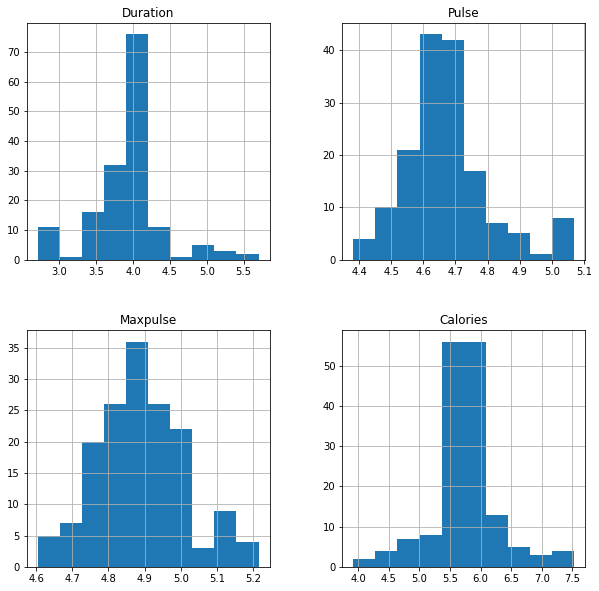

In [245]:
clean_df.hist(figsize=(10,10))
plt.show()

In [246]:
clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,158.0,3.982112,0.501191,2.708050,3.806662,4.094345,4.094345,5.703782
Pulse,158.0,4.672798,0.128830,4.382027,4.605170,4.663439,4.716257,5.068904
Maxpulse,158.0,4.892434,0.122015,4.605170,4.820282,4.875197,4.962845,5.214936
Calories,158.0,5.739124,0.548023,3.918005,5.523359,5.749162,5.944306,7.528547


In [247]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,164.0,4.011902,0.523144,2.708050,3.806662,4.094345,4.094345,5.703782
Pulse,164.0,4.670736,0.127463,4.382027,4.605170,4.658700,4.709530,5.068904
Maxpulse,164.0,4.892539,0.120885,4.605170,4.820282,4.875197,4.962845,5.214936
Calories,164.0,5.764605,0.558803,3.918005,5.525154,5.763935,5.959974,7.528547


In [248]:
var = np.var(df)
print(var)
print(var.sum())

Duration    0.272011
Pulse       0.016148
Maxpulse    0.014524
Calories    0.310357
dtype: float64
0.6130398922749403


In [249]:
clean_var = np.var(clean_df)
print(clean_var)
print(clean_var.sum())

Duration    0.249602
Pulse       0.016492
Maxpulse    0.014793
Calories    0.298428
dtype: float64
0.5793158608512582


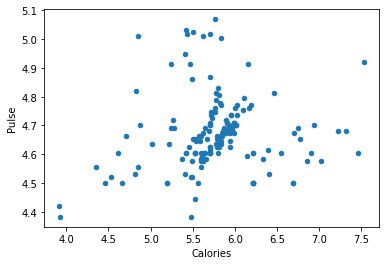

In [250]:
df.plot(x ='Calories', y='Pulse', kind='scatter')
plt.show()

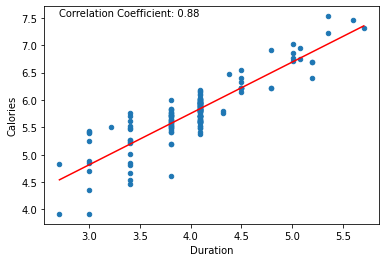

In [251]:
x_var = 'Duration'
y_var = 'Calories'

corr_coef = df[x_var].corr(df[y_var])

df.plot(x=x_var, y=y_var, kind='scatter')
plt.plot(np.unique(df[x_var]), np.poly1d(np.polyfit(df[x_var], df[y_var], 1))(np.unique(df[x_var])), color='red')
plt.text(df[x_var].min(), df[y_var].max(), f"Correlation Coefficient: {corr_coef:.2f}")
plt.show()

In [257]:
def corr_plot(df, x, y, plot_type='scatter', line_color='red', font_size=10):
    plt.rcParams.update({'font.size': font_size}) # set the font size
    corr_coef = df[x].corr(df[y])
    df.plot(x=x, y=y, kind=plot_type)
    plt.plot(np.unique(df[x]), np.poly1d(np.polyfit(df[x], df[y], 1))(np.unique(df[x])), color=line_color)
    plt.text(df[x].min(), df[y].max(), f"Correlation Coefficient: {corr_coef:.2f}")
    plt.show()


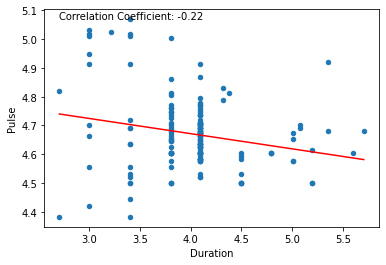

In [258]:
corr_plot(df, x='Duration', y='Pulse')

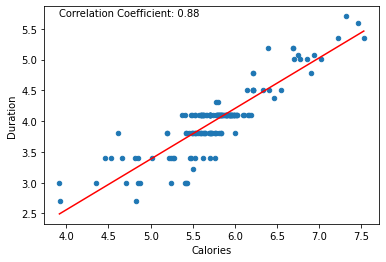

In [259]:
corr_plot(df, x='Calories', y='Duration')

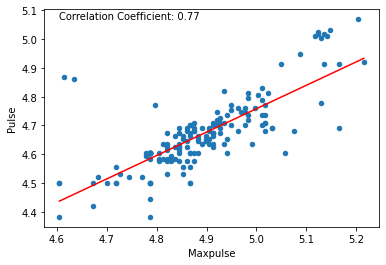

In [260]:
corr_plot(df, x='Maxpulse', y='Pulse')

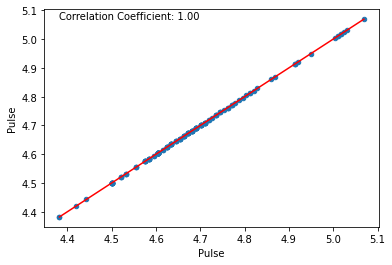

In [261]:
corr_plot(df, x='Pulse', y='Pulse')

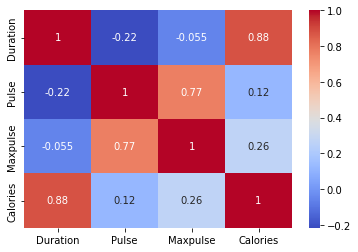

In [262]:
ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [263]:
# convert data to numpy array
var_to_analyze = np.asarray(df['Duration'])

# calculate mean and standard deviation
mean, sd = np.mean(var_to_analyze), np.std(var_to_analyze)

# determine threshold and detect outliers
threshold = 2.5
outliers = var_to_analyze[np.abs((var_to_analyze - mean) / sd) > threshold]

# print outliers    
print("The detected outliers are: ", outliers)

# remove outliers from the original dataset
var_clean = var_to_analyze[np.abs((var_to_analyze - mean) / sd) <= threshold]

var_clean = pd.DataFrame(var_clean, columns=['Duration'])


# print the cleaned dataset
print("The cleaned var without outliers is: ", var_clean)

The detected outliers are:  [5.34710753 5.70378247 5.59842196 5.34710753]
The cleaned var without outliers is:       Duration
0    4.094345
1    4.094345
2    4.094345
3    3.806662
4    3.806662
..        ...
155  4.094345
156  4.094345
157  4.094345
158  4.317488
159  4.317488

[160 rows x 1 columns]


<AxesSubplot: xlabel='Duration', ylabel='Count'>

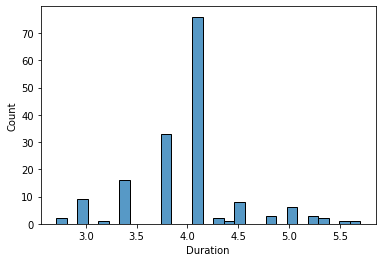

In [264]:
sns.histplot(df['Duration'])

<AxesSubplot: xlabel='Duration', ylabel='Count'>

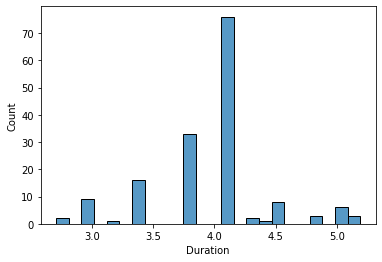

In [265]:
sns.histplot(var_clean['Duration'])

<AxesSubplot: ylabel='Duration'>

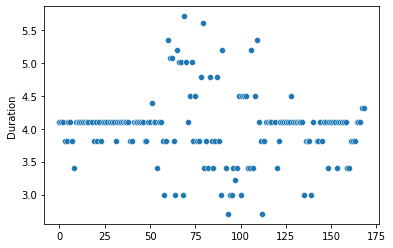

In [266]:
sns.scatterplot(df['Duration'])

In [267]:
print(np.var(df['Duration']))

0.27201122496474095


<AxesSubplot: ylabel='Duration'>

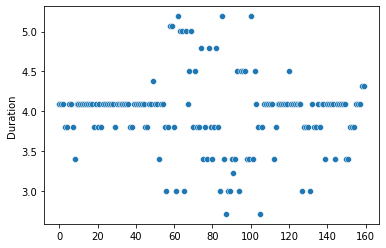

In [268]:
sns.scatterplot(var_clean['Duration'])

In [269]:
print(np.var(var_clean['Duration']))

0.22152255892796857


In [270]:
from scipy.stats import skew

# Assuming that your data is in a numpy array called `data`
# Calculate the skewness of each column
skewness = np.apply_along_axis(skew, axis=0, arr=df)

# Check the skewness of each column and determine if it is left, right, or normally distributed
for i, s in enumerate(skewness):
    if s > 0:
        print(f"Feature {i} is right skewed")
    elif s < 0:
        print(f"Feature {i} is left skewed")
    else:
        print(f"Feature {i} is normally distributed")


Feature 0 is right skewed
Feature 1 is right skewed
Feature 2 is right skewed
Feature 3 is right skewed


In [271]:
# calculate mean and standard deviation
median, sd = df.median(axis=0), np.std(df)

# determine threshold and detect outliers
threshold = 2.5
outliers = df[np.abs((df - median) / sd) > threshold]

# remove outliers from the original dataset
df_clean = df[np.abs((df - median) / sd) <= threshold]

# print the number of outliers and cleaned data
print("Number of outliers:", len(outliers))
print("Cleaned dataset:", df_clean)

# compare the original dataset with the cleaned dataset
print("Original dataset:\n", df)
print("Cleaned dataset:\n", df_clean)


Number of outliers: 164
Cleaned dataset:      Duration     Pulse  Maxpulse  Calories
0    4.094345  4.700480  4.867534  6.013960
1    4.094345  4.762174  4.976734  6.171701
2    4.094345  4.634729  4.905275  5.828946
3    3.806662  4.691348  5.164786  5.643325
4    3.806662  4.762174  4.997212  6.006353
..        ...       ...       ...       ...
164  4.094345  4.653960  4.941642  5.672636
165  4.094345  4.700480  4.976734  5.703782
166  4.094345  4.744932  4.976734  5.737217
167  4.317488  4.787492  5.010635  5.769570
168  4.317488  4.828314  5.010635  5.800304

[164 rows x 4 columns]
Original dataset:
      Duration     Pulse  Maxpulse  Calories
0    4.094345  4.700480  4.867534  6.013960
1    4.094345  4.762174  4.976734  6.171701
2    4.094345  4.634729  4.905275  5.828946
3    3.806662  4.691348  5.164786  5.643325
4    3.806662  4.762174  4.997212  6.006353
..        ...       ...       ...       ...
164  4.094345  4.653960  4.941642  5.672636
165  4.094345  4.700480  4.976734  5

In [272]:
df.shape

(164, 4)

In [273]:
df_clean.shape

(164, 4)

In [274]:
print(np.var(df))
print(np.var(df).sum())

Duration    0.272011
Pulse       0.016148
Maxpulse    0.014524
Calories    0.310357
dtype: float64
0.6130398922749403


In [275]:
print(np.var(df_clean))
print(np.var(df_clean).sum())

Duration    0.223922
Pulse       0.010272
Maxpulse    0.013448
Calories    0.201156
dtype: float64
0.4487969738779091


<AxesSubplot: ylabel='Duration'>

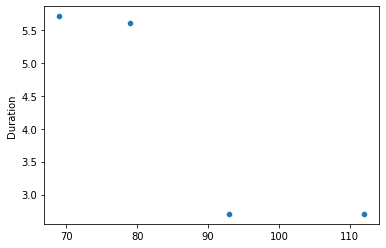

In [276]:
sns.scatterplot(outliers['Duration'])

<AxesSubplot: ylabel='Calories'>

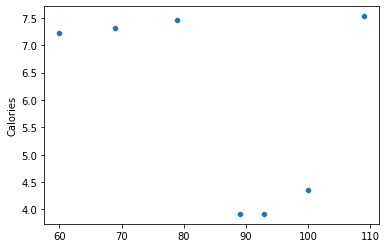

In [277]:
sns.scatterplot(outliers['Calories'])

<AxesSubplot: ylabel='Maxpulse'>

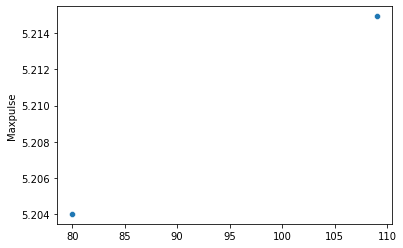

In [278]:
sns.scatterplot(outliers['Maxpulse'])

<AxesSubplot: ylabel='Pulse'>

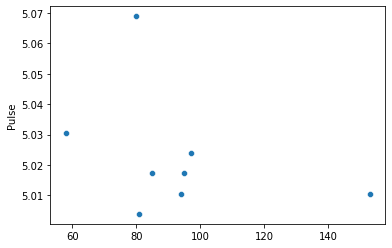

In [279]:
sns.scatterplot(outliers['Pulse'])

array([[<AxesSubplot: title={'center': 'Duration'}>,
        <AxesSubplot: title={'center': 'Pulse'}>],
       [<AxesSubplot: title={'center': 'Maxpulse'}>,
        <AxesSubplot: title={'center': 'Calories'}>]], dtype=object)

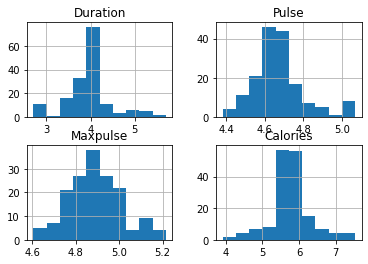

In [280]:
df.hist()

array([[<AxesSubplot: title={'center': 'Duration'}>,
        <AxesSubplot: title={'center': 'Pulse'}>],
       [<AxesSubplot: title={'center': 'Maxpulse'}>,
        <AxesSubplot: title={'center': 'Calories'}>]], dtype=object)

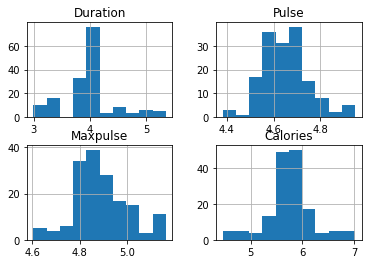

In [281]:
df_clean.hist()

In [282]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,164.0,4.011902,0.523144,2.708050,3.806662,4.094345,4.094345,5.703782
Pulse,164.0,4.670736,0.127463,4.382027,4.605170,4.658700,4.709530,5.068904
Maxpulse,164.0,4.892539,0.120885,4.605170,4.820282,4.875197,4.962845,5.214936
Calories,164.0,5.764605,0.558803,3.918005,5.525154,5.763935,5.959974,7.528547


In [283]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,160.0,4.007710,0.474689,2.995732,3.806662,4.094345,4.094345,5.347108
Pulse,156.0,4.652677,0.101678,4.382027,4.605170,4.653960,4.700480,4.948760
Maxpulse,162.0,4.888626,0.116323,4.605170,4.820282,4.875197,4.948760,5.164786
Calories,157.0,5.755912,0.449939,4.456670,5.534575,5.762051,5.947513,7.016610


In [284]:
def outlier_remover(df, tendency, threshold=2.5):
    tendency_func = getattr(df, tendency)(axis=0)
    sd = np.std(df, axis=0)
    
    threshold = threshold
    df_clean = df[np.abs((df - tendency_func) / sd) <= threshold]
    return df_clean


In [285]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,164.0,4.011902,0.523144,2.708050,3.806662,4.094345,4.094345,5.703782
Pulse,164.0,4.670736,0.127463,4.382027,4.605170,4.658700,4.709530,5.068904
Maxpulse,164.0,4.892539,0.120885,4.605170,4.820282,4.875197,4.962845,5.214936
Calories,164.0,5.764605,0.558803,3.918005,5.525154,5.763935,5.959974,7.528547


In [286]:
test_df = outlier_remover(df, 'median')

test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,160.0,4.007710,0.474689,2.995732,3.806662,4.094345,4.094345,5.347108
Pulse,156.0,4.652677,0.101678,4.382027,4.605170,4.653960,4.700480,4.948760
Maxpulse,162.0,4.888626,0.116323,4.605170,4.820282,4.875197,4.948760,5.164786
Calories,157.0,5.755912,0.449939,4.456670,5.534575,5.762051,5.947513,7.016610


In [287]:
var_orig_df = np.var(df).sum()
var_test_df = np.var(test_df).sum()

In [288]:
msg_1 = 'Var of original DF'
msg_2 = 'Var of cleaned DF'

print(f'{msg_1:15} : {var_orig_df}')
print(f'{msg_2:18} : {var_test_df}')

Var of original DF : 0.6130398922749403
Var of cleaned DF  : 0.4487969738779091


<AxesSubplot: >

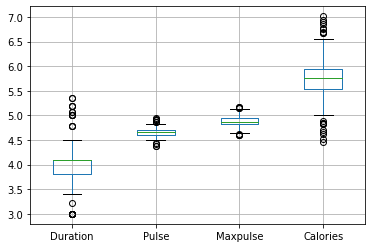

In [289]:
df_clean.boxplot()

<AxesSubplot: >

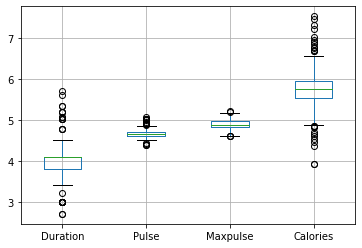

In [290]:
df.boxplot()

In [291]:
df.corr().sum()

Duration    1.606307
Pulse       1.675086
Maxpulse    1.980598
Calories    2.263581
dtype: float64

In [292]:
df_clean.corr().sum()

Duration    1.642306
Pulse       1.723643
Maxpulse    1.635279
Calories    2.022097
dtype: float64

In [293]:
df_clean.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.042934,-0.14628,0.831520
Pulse,-0.042934,1.000000,0.67878,0.087797
Maxpulse,-0.146280,0.678780,1.00000,0.102780
Calories,0.831520,0.087797,0.10278,1.000000


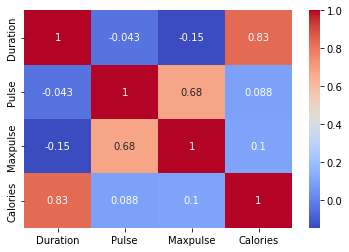

In [294]:
ax = sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')

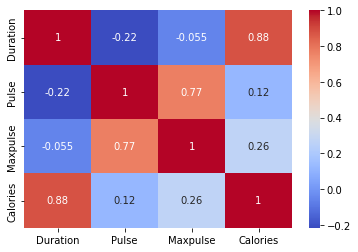

In [295]:
ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Immediate and Direct Findings

- There is a strong positive correlation <span style="color:gold">(r=0.8315)</span> between the duration of exercise and the number of calories burned. <span style="color:lightgreen"><b>This suggests that as the duration of exercise increases, the number of calories burned also tends to increase.</b></span>

- There is a weak negative correlation <span style="color:red">(r=-0.0429)</span> between the pulse rate during exercise and the duration of exercise. <span style="color:lightgreen"><b>This suggests that as the duration of exercise increases, the pulse rate tends to decrease slightly.</b></span>

- There is a moderate positive correlation <span style="color:coral">(r=0.6788)</span> between the pulse rate during exercise and the maximum pulse rate achieved during exercise. <span style="color:lightgreen"><b>This suggests that individuals with higher pulse rates during exercise tend to achieve higher maximum pulse rates as well.</b></span>

- There is a weak positive correlation <span style="color:red">(r=0.1028)</span> between the number of calories burned and the maximum pulse rate achieved during exercise. <span style="color:lightgreen"><b>This suggests that individuals who burn more calories during exercise tend to achieve slightly higher maximum pulse rates as well.</b></span>

# CONCLUSIONS AND ANALYSIS

<p>↑ Duration of exercise = ↑ Calories Burned (Reliable: r=0.8315)
<p>↑ Duration of exercise = ↓ Pulse rate decrease a bit (Unreliable: r=-0.0429) 
<p>↑ Pulse Rates = ↑ Max Pulse Rates (Quite Reliable: r=0.6788) * CAUSALITY ALERT! Requires further research
<p>↑ Calories Burned = ↑ Higher Pulse rates (Unreliable: r=0.1028)

